## STEP 02: DATA PREPROCESSING 

### 1) Load the dataset


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform, pdist

In [2]:
data = pd.read_excel("dataset/dim_reduct_v1.xlsx")
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


### 2) Calculate the variables distances

In [3]:
# Compute correlation matrix
corr_matrix = data.corr().values

# Convert correlation to distance: distance = 1 - |correlation|
distance_matrix = 1 - np.abs(corr_matrix)

# Make sure it's a valid condensed distance matrix
distance_matrix = np.nan_to_num(distance_matrix)  # Handle NaN if any

In [4]:
distance_matrix

array([[0.        , 0.44176229, 0.78444396, ..., 0.99689007, 0.96375043,
        0.93811592],
       [0.44176229, 0.        , 0.91347969, ..., 0.8709086 , 0.81326087,
        0.8788283 ],
       [0.78444396, 0.91347969, 0.        , ..., 0.8319527 , 0.78699514,
        0.8820569 ],
       ...,
       [0.99689007, 0.8709086 , 0.8319527 , ..., 0.        , 0.74351926,
        0.62775743],
       [0.96375043, 0.81326087, 0.78699514, ..., 0.74351926, 0.        ,
        0.71739251],
       [0.93811592, 0.8788283 , 0.8820569 , ..., 0.62775743, 0.71739251,
        0.        ]])

In [5]:
# Perform hierarchical clustering
Z = linkage(squareform(distance_matrix), method='average')  # 'average', 'complete', 'ward'

### 3) Hierarchical Clustering Visualization: Dendogram

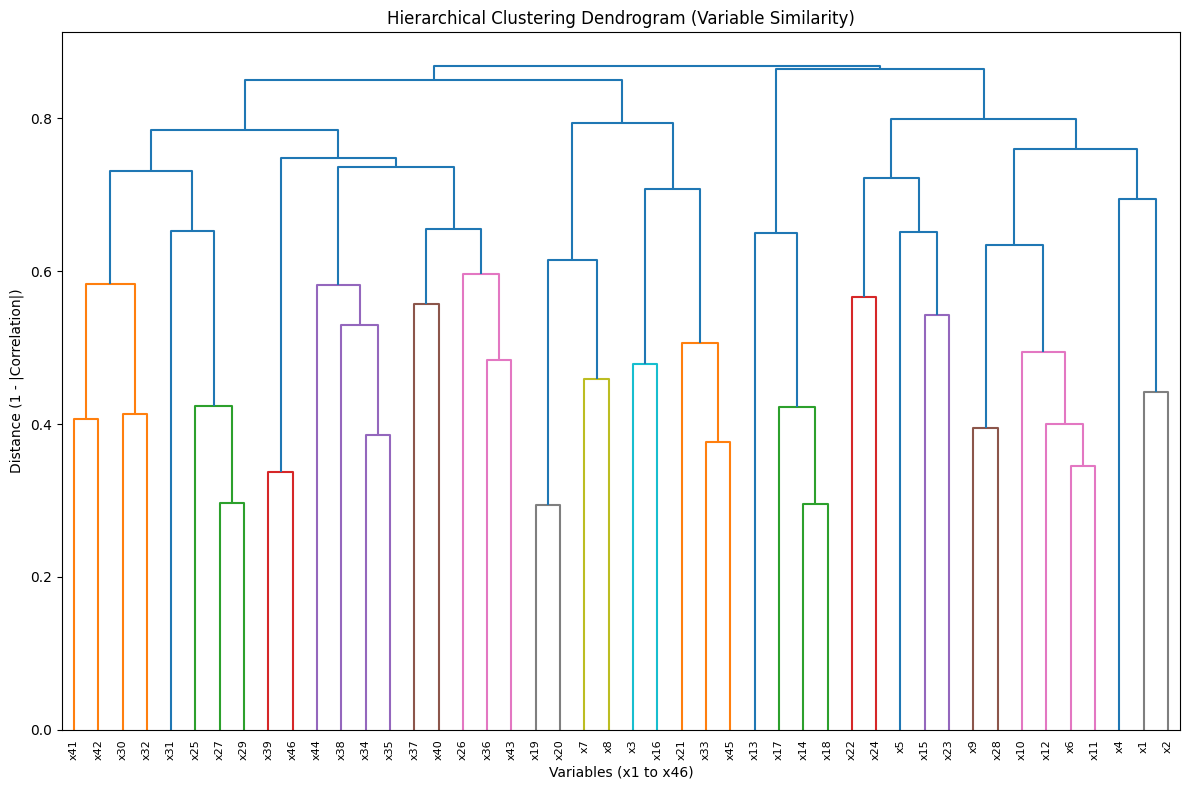

In [6]:
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=data.columns, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram (Variable Similarity)")
plt.xlabel("Variables (x1 to x46)")
plt.ylabel("Distance (1 - |Correlation|)")
plt.tight_layout()
plt.show()

Strategy of grouping variables by similarity

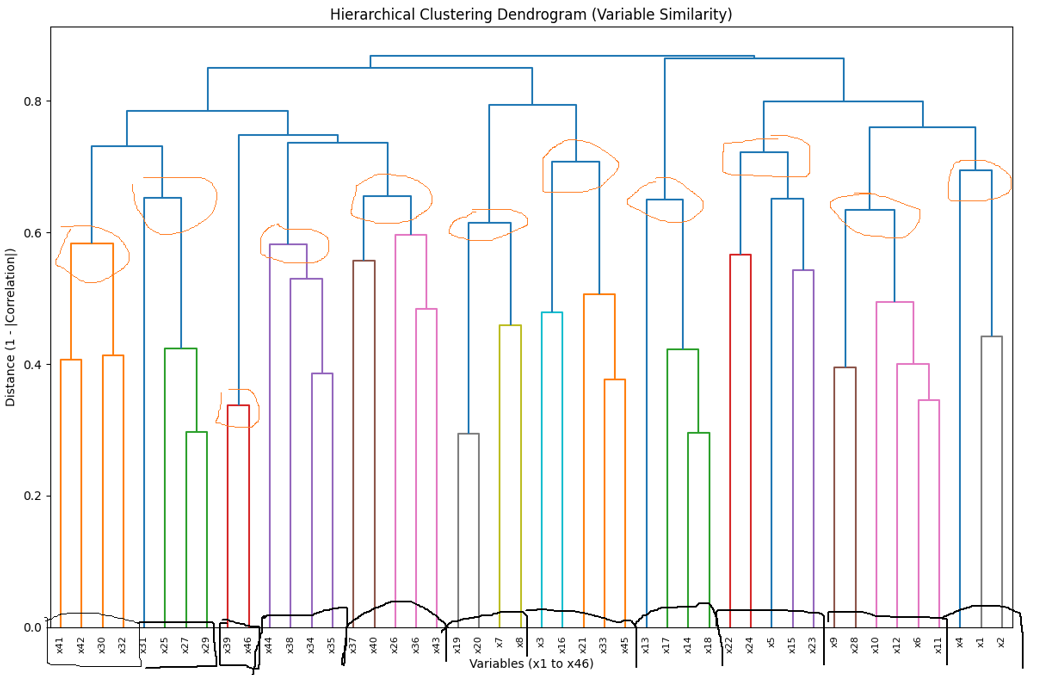

### 4) Dimensionality Reduction through AutoEncoders

In [7]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,3.849137,1.725248,-0.497857,-7.471147,-1.358693,20.679510,-7.156252,-5.922557,11.775078,12.805041,...,5.875273,-8.201165,-7.349066,8.400065,-3.574463,-3.972343,-7.698369,-12.547030,-11.175359,-7.300101
1,1.849205,5.725294,1.500639,-2.476777,0.652022,-7.295257,6.844819,2.074821,-0.229143,-3.202466,...,-16.125269,-8.199851,-7.349889,-15.599984,-7.573024,-7.974543,0.300784,-0.549105,-11.175287,-9.298986
2,-0.145611,1.724171,-2.497465,51.531324,-3.360381,-1.306102,22.861799,2.083873,-12.225997,-3.200507,...,-4.125097,-0.199366,-11.350312,0.399975,2.426235,-5.974534,-9.699327,9.449166,-11.174942,-5.299410
3,7.846525,11.725204,-0.498598,5.521087,-1.345795,6.704815,-3.156028,-3.918687,7.775375,6.795616,...,5.875156,9.800418,-13.349669,2.400016,-7.574656,6.024878,10.297886,1.449433,-19.174877,0.700456
4,3.849137,1.724367,3.495523,-4.471270,-1.345795,6.692408,-7.141126,-9.918679,-2.226091,-7.203657,...,-10.125281,-10.203094,-15.349944,-7.599953,-7.573840,-1.974245,-9.698324,-4.543951,-11.175121,-9.298986


In [8]:
data.shape

(40, 46)

### Autoencoder model

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.callbacks import LambdaCallback

In [43]:
def autoencoder_compressor(data, input_dim, output_dim):
    # Architecture with intermediate layer and LeakyReLU
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(2)(input_layer)  # Intermediate layer
    encoded = LeakyReLU(negative_slope=0.1)(encoded)  # Avoid dead neurons
    encoded = Dense(output_dim, activation='linear')(encoded)  # Final bottleneck
    
    # Decoder
    decoded = Dense(input_dim, activation='linear')(encoded)
    
    # Model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    callback = LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(f"Epoch {epoch + 1}: loss = {logs['loss']:.4f}") 
        if (epoch + 1) % 25 == 0 else None)
    
    autoencoder.fit(data, data, epochs = 500, batch_size = 5, verbose = 0, callbacks = [callback])
    
    # Encoder (for dimensionality reduction)
    encoder = Model(input_layer, encoded)
    result = encoder.predict(data)
    return result

#### Dimensionality reduction using hierarchical clusters

In [44]:
subgroups = {
    "group01": ["x41", "x42", "x30", "x32"],
    "group02": ["x31", "x25", "x27", "x29"],
    "group03": ["x39", "x46"],
    "group04": ["x44", "x38", "x34", "x35"],
    "group05": ["x37","x40", "x26", "x36", "x43"],
    "group06": ["x19", "x20", "x7", "x8"],
    "group07": ["x3", "x16", "x21", "x33", "x45"],
    "group08": ["x13", "x17", "x14", "x18"],
    "group09": ["x22", "x24","x5", "x15", "x23"],
    "group10": ["x9", "x28", "x10", "x12", "x6", "x11"],
    "group11": ["x4", "x1", "x2"]
}

In [45]:
subgroups.items()

dict_items([('group01', ['x41', 'x42', 'x30', 'x32']), ('group02', ['x31', 'x25', 'x27', 'x29']), ('group03', ['x39', 'x46']), ('group04', ['x44', 'x38', 'x34', 'x35']), ('group05', ['x37', 'x40', 'x26', 'x36', 'x43']), ('group06', ['x19', 'x20', 'x7', 'x8']), ('group07', ['x3', 'x16', 'x21', 'x33', 'x45']), ('group08', ['x13', 'x17', 'x14', 'x18']), ('group09', ['x22', 'x24', 'x5', 'x15', 'x23']), ('group10', ['x9', 'x28', 'x10', 'x12', 'x6', 'x11']), ('group11', ['x4', 'x1', 'x2'])])

In [46]:
data[subgroups["group01"]].head()

,x41,x42,x30,x32
0,-3.574463,-3.972343,-5.075038,-7.999031
1,-7.573024,-7.974543,-1.072523,-9.998484
2,2.426235,-5.974534,-7.074185,0.000340
3,-7.574656,6.024878,-11.074297,2.000313
4,-7.573840,-1.974245,8.926775,0.000652


In [47]:
data[subgroups["group01"]].shape

(40, 4)

In [48]:
def compression_data(data, subgroups):
    data_compressed = np.empty((data.shape[0], 0))
    for key, val in subgroups.items():
        aux = []
        aux = autoencoder_compressor(data = data[val], input_dim = len(val), output_dim = 1)
        aux = np.array(aux).reshape(-1, 1)        
        data_compressed = np.hstack([data_compressed, aux])
        print("The " + key + " compression is done ...")
    return data_compressed

In [49]:
final_table = compression_data(data, subgroups)

Epoch 25: loss = 55.4502
Epoch 50: loss = 52.3889
Epoch 75: loss = 50.3891
Epoch 100: loss = 49.0303
Epoch 125: loss = 48.0525
Epoch 150: loss = 47.3027
Epoch 175: loss = 46.6858
Epoch 200: loss = 46.1562
Epoch 225: loss = 45.7022
Epoch 250: loss = 45.3087
Epoch 275: loss = 44.9678
Epoch 300: loss = 44.6767
Epoch 325: loss = 44.4270
Epoch 350: loss = 44.2048
Epoch 375: loss = 44.0168
Epoch 400: loss = 43.8614
Epoch 425: loss = 43.6956
Epoch 450: loss = 43.5451
Epoch 475: loss = 43.4320
Epoch 500: loss = 43.3321
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The group01 compression is done ...
Epoch 25: loss = 136.0702
Epoch 50: loss = 131.0310
Epoch 75: loss = 120.4698
Epoch 100: loss = 101.5912
Epoch 125: loss = 81.1645
Epoch 150: loss = 66.2574
Epoch 175: loss = 59.7751
Epoch 200: loss = 57.2576
Epoch 225: loss = 56.1997
Epoch 250: loss = 55.5102
Epoch 275: loss = 55.0506
Epoch 300: loss = 54.6898
Epoch 325: loss = 54.3739
Epoch 350: loss = 54.1644
Epoch 375: loss = 53.9589
Epoch 400: loss =

In [50]:
final_table

array([[-2.91265059e+00, -5.32155342e+01, -4.03041267e+00,
         4.30759907e+00, -6.89037466e+00, -1.48930922e+01,
         8.81944180e+00, -7.71198130e+00,  3.22506213e+00,
         2.61671734e+01,  5.58391809e-01],
       [-3.12978935e+00,  4.00841370e+01, -4.23839426e+00,
         6.18829441e+00, -1.70120373e+01, -1.09145746e+01,
         1.23706608e+01, -8.12566757e+00,  3.36378551e+00,
         9.61881995e-01, -4.18417454e-02],
       [-2.44896603e+00,  2.81661510e+01, -4.37238979e+00,
        -4.44633055e+00, -6.56014109e+00,  3.49641013e+00,
         1.08874054e+01,  1.95349903e+01,  2.25880885e+00,
        -1.65591984e+01, -4.65218811e+01],
       [-2.84255290e+00,  2.77781029e+01, -4.02329302e+00,
        -7.02234936e+00,  3.28589463e+00, -3.89289021e+00,
         1.96012230e+01, -1.24370909e+01,  3.87729502e+00,
         1.34912167e+01, -6.35067940e+00],
       [-2.01573277e+00,  1.70668259e+01, -5.33812666e+00,
         5.86528921e+00, -4.93977642e+00, -9.80422115e+00,
  

In [51]:
# convert to pandas dataframe
frame_dataset = pd.DataFrame(final_table)

In [52]:
frame_dataset.columns = ["x1*", "x2*", "x3*", "x4*", "x5*", 
                         "x6*", "x7*", "x8*", "x9*", "x10*", "x11*"]

In [53]:
frame_dataset.head()

,x1*,x2*,x3*,x4*,x5*,x6*,x7*,x8*,x9*,x10*,x11*
0,-2.912651,-53.215534,-4.030413,4.307599,-6.890375,-14.893092,8.819442,-7.711981,3.225062,26.167173,0.558392
1,-3.129789,40.084137,-4.238394,6.188294,-17.012037,-10.914575,12.370661,-8.125668,3.363786,0.961882,-0.041842
2,-2.448966,28.166151,-4.372390,-4.446331,-6.560141,3.496410,10.887405,19.534990,2.258809,-16.559198,-46.521881
3,-2.842553,27.778103,-4.023293,-7.022349,3.285895,-3.892890,19.601223,-12.437091,3.877295,13.491217,-6.350679
4,-2.015733,17.066826,-5.338127,5.865289,-4.939776,-9.804221,7.409998,-12.161316,2.748820,-3.558533,0.300328


In [54]:
print("Final dimensionality: ", frame_dataset.shape)

Final dimensionality:  (40, 11)


In [56]:
# save dataframe as excel file
frame_dataset.to_excel("dataset/compressed_to_11d.xlsx", index = False)

--------------------------- 